$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
\newcommand{example}{\textbf{Example: }}
\newcommand{lemma}{\textbf{Lemma: }}
\newcommand{corollary}{\textbf{Corollary: }}
\newcommand{prop}{\textbf{Proposition: }}
$$

$$
\newcommand{v}{\mathbf}
\newcommand{inv}{^{-1}}
\newcommand\mat[1]{\begin{pmatrix}#1\end{pmatrix}} 
\newcommand\det[1]{\left| #1\right|} 
\newcommand\norm[1]{\lVert #1\rVert} 
\newcommand\set[1]{\left\{#1\right\}} 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vector field

A **vector field** $\bf F$ assigns a vector to each point $P$ in its domain.

We can represent it as arrows pointing in the direction of $\bf F(x,y)$ starting at $(x,y)$.


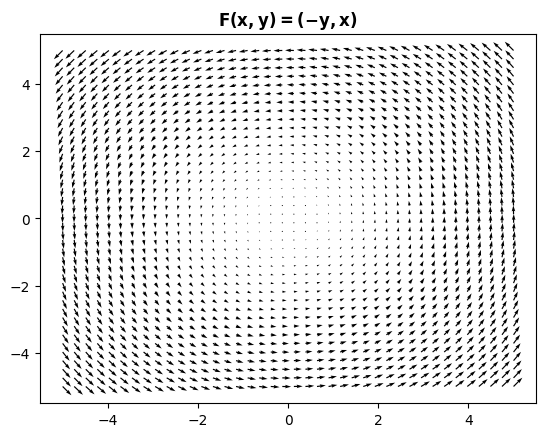

In [2]:
xs = np.linspace(-5, 5, 40)
ys = np.linspace(-5, 5, 40)
xs, ys = np.meshgrid(xs, ys)
fx = -ys
fy = xs
plt.quiver(xs, ys, fx, fy)
plt.title("$\\bf F(x,y) = (-y, x)$")
plt.show()

We also define similarly for 3D.

## Work

From physics, we know tha the work done by object moving from $A$ to $B$ in the presence of a force $\bf F$ is
$$
\bf F \cdot \vec{AB}
$$

Our goal is to compute the work done by the force when we move a particle along a **smooth, oriented** curve $C$.

Imagine it as a car driving along some road, and we know the wind direction and force at each location;
while we wish to find the overall wind force that is acting on the car while we drive along the road.

Once again, we subdivide $C$ into subarcs of $P_{i-1} P_i$ with length $\Delta s_i$.

At each point $P_i^*$, if $\v{T}(t_i^*)$ is the unit tangent vector to $C$ at that point,
then when $\Delta s_i$ is small, we get:
* the subarc $P_{i-1}P_i$ is approximately straight
* the vector $\vec{P_{i-1}P_i}$ is approximately $\Delta s_i \v{T}(t_i^*)%
* the force acting on that point is approximately constant

Hence, the work done by $\v F$ in moving along the subarc is approximately
$$
\v F(x_i^*, y_i^*)\cdot \v T(t_i^*) \Delta s_i 
$$

Taking our sum once again, we get

$$
\begin{align*}
W &= \lim _{n \to \infty} \sum ^n _ {i=1} \v{F}(x_i^*, y_i^*) \cdot \v{T}(x_i^*, y_i^*) \Delta s_i \\
& = \int _C \v{F} (x, y) \cdot \v{T}(x, y) ds
\end{align*}
$$

Suppose that we can parameterize $C$ by $R(t) = (x(t), y(t))$.

Then 
$$
\v{T}(t) = \frac{R'(t)}{\norm{R'(t)}} \quad \frac{ds}{dt} = \norm{R'(t)}
$$

therefore:
$$
\int _C \v{F} (x, y) \cdot \v{T}(x, y) ds = 
\int _a ^b \v{F} (x, y) \cdot \frac{R'(t)}{\norm{R'(t)}} \norm{R'(t)} dt =
\int _a ^b \v{F} (x, y) \cdot R'(t) dt
$$

Notice that since we are taking the unit vector at $P_i$, the actualy magnitude of the tangent vector does not matter.
This means that the work done does not change base on our parameterization of $C$, if the orientation is the same.
This agrees with our physics intuition, since work is a function of displacement, not velocity.

If $C$ is paremeterized in the opposite direction, the resultant work will be $-W$.

## Fundamental theorem for line integral

If $\v{F} = \nabla f$ for some function $f$, then
$$
\int _C \nabla f . d R = f(x(b), y(b)) - f(x(a), y(a))
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        <p>
        $$
        \int _C \nabla f \cdot dR = \int _a ^b \mat{f_x \\ f_y} \cdot \mat{x'(t) \\ y'(t)} dt = \int _a ^b f_x x'(t) + f_y y'(t) dt = \int _a ^b \frac{df}{dt} dt = f(b) - f(a)
        $$
        $QED$
        </p>
    </div>
</details>

When such a $f$ exists such that $\v{F} = \nabla f$, then the vector field is **conservative**.
And $f$ is the **potential function** of $\v F$.

This gives us a really convenient result.
We simply need to find the value at the two endpoints of $C$ to find the work.

Or in other words, the path of $C$ **does not matter**, only the endpoints matter.

## Testing for conservative field

To show that a field is conservative, we simply find $f$.

To show it is not conservative, we find two paths with the same two endpoints, but with different line integrals.

Or we can also use the following theorem

$\theorem$

Given $\v{F}(x,y) = (X(x,y), Y(x,y))$ is a vector field in an **open and simply-connected** region $D$
and both $X$ and $Y$ have continuous first-order partial derivatives on $D$, then
$$
\frac{\partial X}{\partial y} = \frac{\partial Y}{\partial x}
$$
for all points in $D$ if and only if $\v{F}$ is conservative on $D$.

An open and simply connected region is a region that:
* any 2 points can be joined by a path entirely in the region
* does not contain any boundary points

For 3D, our equality is the following:
$$
\frac{\partial X}{\partial y} = \frac{\partial Y}{\partial x} \quad
\frac{\partial Y}{\partial z} = \frac{\partial Z}{\partial y} \quad
\frac{\partial Z}{\partial x} = \frac{\partial X}{\partial z}
$$

## Green's theorem

$\theorem$ Green's theorem

Given $C$ that is positively oriented, piecewise-smooth, simple closed curve and $D$ be the region bounded by $C$.
If $X(x,y)$  and $Y(x,y)$ have continuous partial derivatives on the open region that contains $D$, then
$$
\int _C \v{F} \cdot dR = \int_C Xdx + Y dy = \int \int _D \left( \frac{\partial Y}{\partial x} - \frac{\partial X}{\partial y} \right) dA
$$

Positively orientation is the counterclockwise traversal of $C$.

This gives us a rather unique result, because instead of integrating along $C$ to find $W$,
we can instead integrate across the area $D$.

### Finding area

In fact, we can also use it the other way round: integrate along $C$ to find the area of $D$.

Area is given by the following double integral:
$$
\int \int _D 1 dA
$$

If we find $P$ and $Q$ such that:
$$
\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} = 1
$$

Then we can convert the double integral into a single integral:

$$
\int \int _D 1 dA = \int _{\partial D} (P, Q) \cdot dR
$$

In fact, we can choose any combinations of $P$ and $Q$ that works, common ones includes:

* $P = 0, Q= x$
* $P = -y, Q= 0$
* $P = -\frac{y}{2} , Q= \frac{x}{2}$

$\example$

Consider a unit circle enclosed by $R$.

$$
\begin{align*}
R &= (\cos t, \sin t) \\
R' &= (-\sin t, \cos t) \\
(P, Q) &= (0, x) = (0, \cos t) \\
\int _{\partial D} (P, Q) \cdot dR &= \int _0 ^ {2\pi} \cos ^2 t dt \\
&= \left[  \frac{x}{2} - \frac{\sin 2x}{4}  \right] _0 ^ {2\pi} \\
&= \pi
\end{align*}
$$

which indeed is the area of a unit circle.

Notice that we only perform a single integration instead of the usual 2.

## Surface integral

### Orientation

To define the surface integral, we need the surface to be **orientable/two-sided**.

This means that we need to be able to define a unit normal vector $\v n$ for each non-boundary point on the sufrace,
such that the coodinate functions of $v n$ are continuous functions.

If a surface is orientable, it would have 2 orientations, $\v n$ and $-\v n$.

An example of a non-orientable surface would be a Mobius strip

We will assume that all surfaces we discuss henceforth are orientable.

Given a parameterization of $R(u, v)$ for the surface, the orientation is simply:
$$
\v n = \frac{R_u \times R_v}{\norm {R_u \times R_v}}
$$

When $S$ is a function of $g(x,y)$, then $\v n$ is the **upward orientation** and $-\v n$ the downward one.

If $S$ is a closed surface, we have the **outward/inward orientations**.


### Flux

Given a oriented surface $\v S= (S,\v n)$, then the surface integral of $\v F$ over $\v S$ is:

$$
\int \int _S \v F \cdot d \v S = \int \int _S \v F \cdot \v n d S = \int \int _D \v F \cdot (R_u \times R_v) dA
$$

We also call this the **flux** of $\v F$ over $\v S$.

Notice that $\v F \cdot \v n$ is actually a scalar, thus the vector integral is actually simply a [surface integral over a scalar field](./integration.ipynb#Surface-integral).
The integrand gives the component of $\v F$ that is in the direction of the orientation $\v n$.

### Divergence

Suppose that $\v F = \mat{P \\ Q \\ R}$, then the **divergence** of $\v F$ is defined by:
$$
\text{div} \v F = \dels{P}{x} + \dels{Q}{y} + \dels{R}{z}
$$

The divergence corresponds to the **net flow** into/out of the region.

In [3]:
xs = np.linspace(-5, 5, 40)
ys = np.linspace(-5, 5, 40)
xs, ys = np.meshgrid(xs, ys)
fx = xs**2
fy = 0

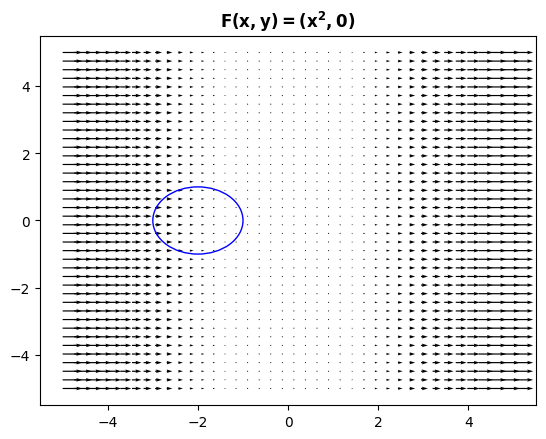

In [4]:
plt.quiver(xs, ys, fx, fy)
plt.title("$\\bf F(x,y) = (x^2, 0)$")
circ = plt.Circle((-2, 0), 1, fill=False, edgecolor='b')

fig = plt.gcf()
ax = fig.gca()

ax.add_patch(circ)
plt.show()

Notice that at the center of the circle, $\text{div} \v F(x,y) = 2x = 2(-2) = -4$, which implies that there is net inflow into the circle.


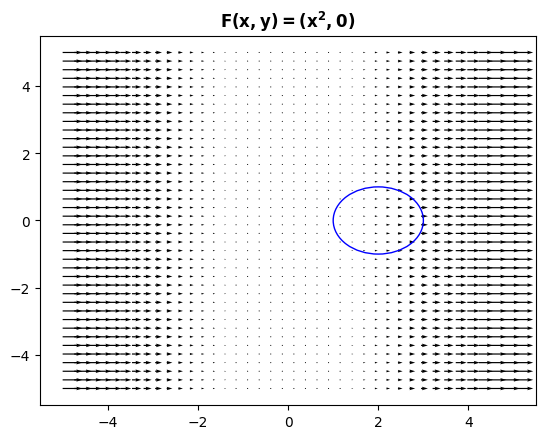

In [5]:
plt.quiver(xs, ys, fx, fy)
plt.title("$\\bf F(x,y) = (x^2, 0)$")
circ = plt.Circle((2, 0), 1, fill=False, edgecolor='b')

fig = plt.gcf()
ax = fig.gca()

ax.add_patch(circ)
plt.show()

Conversely, $\text{div} \v F = 4$ implies that there is net outflow from the circle.

### Gauss' theorem

Recall that [Green's theorem](#Green's-theorem) turns a line integral to a double integral.
**Gauss' theorem** generalizes this, and thus a surface integral into a triple integral:

$\theorem$: Gauss' theorem
$$
\iint _S \v F \cdot \v S = \iiint _E \text{div} \v F dV
$$